In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
step_function(0.4)

1

In [5]:
step_function(np.array([1.0, 2.0]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [7]:
step_function(np.array([1.0, 2.0]))

array([1, 1])

In [8]:
x = np.array([1.0, 2.0])
x > 0

array([ True,  True], dtype=bool)

In [9]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

(-0.1, 1.1)

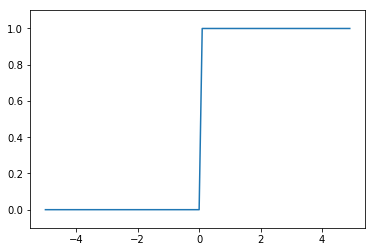

In [11]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

(-0.1, 1.1)

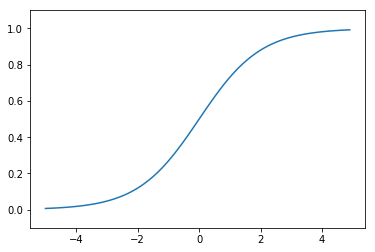

In [13]:
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)

In [14]:
def relu(x):
    return np.maximum(0, x)

(-0.1, 5.0)

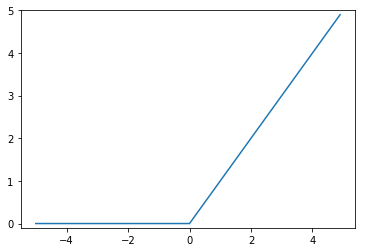

In [15]:
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.0)

### 신경망 각 층의 신호 전달

In [16]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [17]:
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


In [18]:
type(A1)

numpy.ndarray

In [19]:
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [20]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [21]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[ 0.51615984  1.21402696]


In [22]:
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


In [23]:
def identity_function(x):
    return x

In [24]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
print(A3)

[ 0.31682708  0.69627909]


In [25]:
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 앞서 수행한 내용 정리

In [26]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network['B1'] = np.array([0.1, 0.2, 0.3])    
    network['W2'] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network['B2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network['B3'] = np.array([0.1, 0.2])
    
    return network

In [27]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    A1 = np.dot(X, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = identity_function(A3)
    
    return Y    

In [28]:
network = init_network()
network

X = np.array([1.0, 0.5])
Y = forward(network, X)

In [29]:
print(Y)

[ 0.31682708  0.69627909]


### softmax func.

In [30]:
a = np.array([0.3, 2.9, 4.0, 10.0, 1000.0])
exp_a = np.exp(a)
print(a)
print(exp_a)

[  3.00000000e-01   2.90000000e+00   4.00000000e+00   1.00000000e+01
   1.00000000e+03]
[  1.34985881e+00   1.81741454e+01   5.45981500e+01   2.20264658e+04
              inf]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [31]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

inf


In [32]:
y = exp_a / sum_exp_a
print(y)

[  0.   0.   0.   0.  nan]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [33]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [34]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [35]:
c = np.max(a)

In [36]:
a - c

array([  0, -10, -20])

In [37]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [38]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [39]:
a = np.array([1010, 1000, 990])
y = softmax(a)
y

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [40]:
np.sum(y)

1.0

In [41]:
aa = np.array([0.3, 2.9, 4.0])
yy = softmax(aa)
print(yy)

[ 0.01821127  0.24519181  0.73659691]


### 테스트 이미지를 입력해서 실제로 잘 판단하는지 확인

In [42]:
pwd

'C:\\dev\\pythondev\\DeepLearningFromScratch'

In [44]:
cd deep-learning-from-scratch-master/ch03

C:\dev\pythondev\DeepLearningFromScratch\deep-learning-from-scratch-master\ch03


In [45]:
import numpy as np
import neuralnet_mnist
import mnist_show
from dataset.mnist import load_mnist

Accuracy:0.9352
5
(784,)
(28, 28)


In [46]:
# 테스트 이미지와 레이블 읽어들임
_, (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 테스트할 이미지를 눈으로 확인
img = x_test[1111]
label = t_test[1111]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

mnist_show.img_show(img)

4
(784,)
(28, 28)


In [47]:
# 신경망 초기화
# 미리 학습해 두었던 가중치와 바이어스를 읽어들임
network = neuralnet_mnist.init_network()

# 정규화된 테스트 이미지를 새로 불러들임
x_test, t_test = neuralnet_mnist.get_data()

# 테스트 이미지를 입력하여 신경망의 결과를 얻음
y = neuralnet_mnist.predict(network, x_test[1111])
p = np.argmax(y)
print(y)

# 신경망의 추론 결과
# 입력 이미지의 레이블과 비교해 봅시다.
print(p)

[  3.26266195e-06   6.89334820e-06   1.27921303e-04   7.36061111e-06
   9.67263460e-01   1.95317669e-04   2.51364661e-04   2.23082141e-03
   1.05229521e-03   2.88613345e-02]
4


In [48]:
print(network)

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

### 신경망 각 층의 배열 형상(shape)

In [49]:
x, _ = neuralnet_mnist.get_data()

In [50]:
network = neuralnet_mnist.init_network()

In [51]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [52]:
print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [53]:
import importlib

In [54]:
import neuralnet_mnist_batch

Accuracy:0.9352


In [55]:
importlib.reload(neuralnet_mnist)

Accuracy:0.9352


<module 'neuralnet_mnist' from 'C:\\dev\\pythondev\\DeepLearningFromScratch\\deep-learning-from-scratch-master\\ch03\\neuralnet_mnist.py'>

In [56]:
importlib.reload(neuralnet_mnist_batch)

Accuracy:0.9352


<module 'neuralnet_mnist_batch' from 'C:\\dev\\pythondev\\DeepLearningFromScratch\\deep-learning-from-scratch-master\\ch03\\neuralnet_mnist_batch.py'>

### 평균 제곱 오차

In [57]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [58]:
# 예1-1: '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [59]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [60]:
import numpy as np

In [61]:
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [62]:
# 예1-2: '2'일 확률이 더 높은 경우
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]

In [63]:
mean_squared_error(np.array(y), np.array(t))

0.055000000000000014

In [64]:
# 예2: '7'일 확률이 가장 높다고 추정된 결과
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [65]:
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

### 교차 엔트로피 오차

In [66]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [67]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [68]:
# 예1-1: '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [69]:
# 예1-2: '2'일 확률이 더 높은 경우
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.35667480108159988

In [70]:
# 예2: '7'일 확률이 가장 높다고 추정된 결과
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

In [71]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
np.sum(a)

45

In [73]:
b = a.reshape(5, 2)
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [74]:
np.sum(b)

45

In [75]:
np.sum(b, axis=0)

array([20, 25])

In [76]:
np.sum(b, axis=1)

array([ 1,  5,  9, 13, 17])

### 임의의 훈련 데이터 또는 시험 데이터 뽑기
numpy.random.choice()

In [77]:
np.random.choice(1000, 10)

array([ 59, 257, 210, 917, 789,  50,  67, 576, 290, 417])

In [78]:
np.random.choice(10, 5)

array([8, 5, 1, 5, 6])

In [79]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [80]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                  one_hot_label=True)

In [81]:
print(x_train.shape)

(60000, 784)


In [82]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[53825 13978 11660 49844 53245 56104 29972  8558 52027 55657]


In [83]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [84]:
print(x_batch[0])
print(t_batch[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

### (배치용) 교차 엔트로피 오차 구현하기

In [85]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

In [86]:
print(network)

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [87]:
y = neuralnet_mnist.predict(network, x_batch)

In [88]:
print(y)
print(t_batch)

[[  8.76864506e-05   1.86149064e-05   9.96648967e-01   3.03268433e-03
    3.61378710e-07   1.23971740e-05   1.80012212e-04   3.94839117e-06
    1.52583416e-05   1.54298618e-08]
 [  6.47207489e-05   3.00367356e-06   1.11126876e-03   1.12139266e-02
    3.08765675e-06   3.51903764e-05   1.72216570e-08   9.85089898e-01
    5.75718650e-06   2.47307308e-03]
 [  9.90417266e-06   1.61689820e-06   8.07090964e-06   2.82411900e-04
    1.40502409e-04   6.89989101e-05   6.73914471e-08   9.85611558e-01
    6.74401190e-06   1.38701722e-02]
 [  6.61782281e-07   9.49086534e-05   1.12251937e-05   1.52699693e-04
    8.76463473e-01   4.51559387e-03   4.95099346e-04   1.34483809e-04
    1.15063777e-02   1.06625468e-01]
 [  5.88179985e-03   1.45623426e-05   9.83002841e-01   6.10022200e-03
    1.70159965e-05   1.38454110e-04   1.88884253e-04   2.29150362e-04
    4.23331279e-03   1.93692220e-04]
 [  9.28953450e-05   1.79801991e-05   9.98759627e-01   4.08078922e-04
    6.62151024e-07   1.51379290e-05   6.68378

In [89]:
cross_entropy_error(y, t_batch)

0.41001096145482735

In [90]:
y = np.arange(30).reshape(3, 10)
print(y)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


In [91]:
t = np.array([3, 7, 1])
print(t)

[3 7 1]


In [92]:
batch_size = y.shape[0]
print(batch_size)

3


In [93]:
y[np.arange(batch_size), t]

array([ 3, 17, 21])

### 수치 미분의 예

In [94]:
np.float32(1e-50)

0.0

In [95]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [96]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
%matplotlib inline

In [99]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

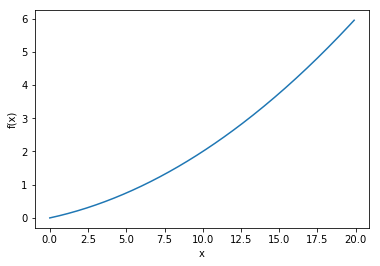

In [100]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)

In [101]:
numerical_diff(function_1, 5)

0.1999999999990898

In [102]:
def tangent_line(f, x):
    a = numerical_diff(f, x)
    print(a)
    b = f(x) - a*x
    return lambda t: a*t + b

In [103]:
tangent = tangent_line(function_1, 5)
tl = tangent(x)
print(tl)

0.1999999999990898
[-0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05 -0.03
 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19  0.21
  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43  0.45
  0.47  0.49  0.51  0.53  0.55  0.57  0.59  0.61  0.63  0.65  0.67  0.69
  0.71  0.73  0.75  0.77  0.79  0.81  0.83  0.85  0.87  0.89  0.91  0.93
  0.95  0.97  0.99  1.01  1.03  1.05  1.07  1.09  1.11  1.13  1.15  1.17
  1.19  1.21  1.23  1.25  1.27  1.29  1.31  1.33  1.35  1.37  1.39  1.41
  1.43  1.45  1.47  1.49  1.51  1.53  1.55  1.57  1.59  1.61  1.63  1.65
  1.67  1.69  1.71  1.73  1.75  1.77  1.79  1.81  1.83  1.85  1.87  1.89
  1.91  1.93  1.95  1.97  1.99  2.01  2.03  2.05  2.07  2.09  2.11  2.13
  2.15  2.17  2.19  2.21  2.23  2.25  2.27  2.29  2.31  2.33  2.35  2.37
  2.39  2.41  2.43  2.45  2.47  2.49  2.51  2.53  2.55  2.57  2.59  2.61
  2.63  2.65  2.67  2.69  2.71  2.73  2.75  2.77  2.79  2.81  2.83  2.85
  2.87  2.89  2.91  2.93  2.95  

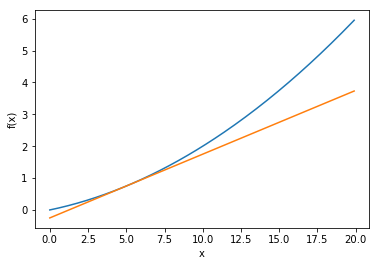

In [104]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, tl)

In [105]:
pwd

'C:\\dev\\pythondev\\DeepLearningFromScratch\\deep-learning-from-scratch-master\\ch03'

In [108]:
cd ../ch04

C:\dev\pythondev\DeepLearningFromScratch\deep-learning-from-scratch-master\ch04


### enumerate

In [109]:
for idx, x in enumerate(['a', 'b', 'c']):
    print(idx, x)

0 a
1 b
2 c


In [110]:
import importlib
importlib.reload(gradient_2d)

NameError: name 'gradient_2d' is not defined

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


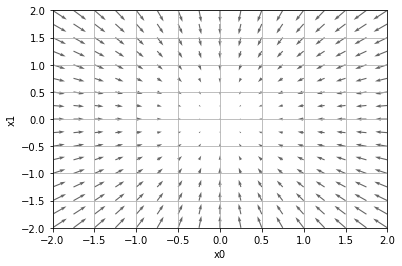

In [112]:
%run gradient_2d

##

In [113]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [114]:
init_x = np.array([-3.0, 4.0])

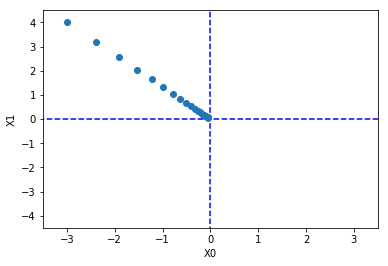

In [115]:
import gradient_method

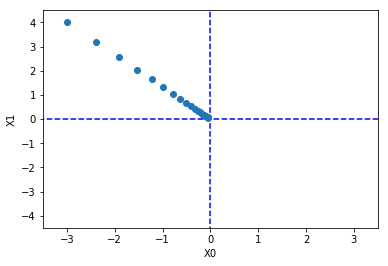

<module 'gradient_method' from 'C:\\dev\\pythondev\\DeepLearningFromScratch\\deep-learning-from-scratch-master\\ch04\\gradient_method.py'>

In [116]:
importlib.reload(gradient_method)

In [117]:
init_x = np.array([-3.0, 4.0])
result, _ = gradient_method.gradient_descent(function_2, init_x=init_x,
                                             lr=0.1, step_num=100)
result

array([ -6.11110793e-10,   8.14814391e-10])

In [118]:
init_x

array([ -6.11110793e-10,   8.14814391e-10])

In [119]:
# 학습률이 크면
result, _ = gradient_method.gradient_descent(function_2, init_x,
                                             lr=10.0, step_num=100)
result

array([  2.34235971e+12,  -3.96091057e+12])

In [120]:
# 학습률이 작으면
result, _ = gradient_method.gradient_descent(function_2, init_x,
                                             lr=1e-10, step_num=100)
result

array([  2.34235971e+12,  -3.96091057e+12])

### 파이썬 리스트 복사

In [121]:
a = [9, 2, 1, 4]
b = a
print(a, b)

[9, 2, 1, 4] [9, 2, 1, 4]


In [122]:
b[0] = 999
print(a, b)

[999, 2, 1, 4] [999, 2, 1, 4]


In [123]:
c = a[:]
d = list(a)
print(c is a)
print(d is a)
print(b is a)

False
False
True


In [124]:
a = [1, 2, ['a', 'b'], 3]
c = a[:]
print(c is a)

False


In [125]:
a[2][1] = 'xyz'
print(a)

[1, 2, ['a', 'xyz'], 3]


In [126]:
print(c)

[1, 2, ['a', 'xyz'], 3]


In [127]:
import copy

In [128]:
d = copy.deepcopy(a)

In [129]:
a[2][0] = 'abc'
print(a)
print(c)
print(d)

[1, 2, ['abc', 'xyz'], 3]
[1, 2, ['abc', 'xyz'], 3]
[1, 2, ['a', 'xyz'], 3]


In [130]:
a[0] = 111
print(a)
print(c)
print(d)

[111, 2, ['abc', 'xyz'], 3]
[1, 2, ['abc', 'xyz'], 3]
[1, 2, ['a', 'xyz'], 3]


In [131]:
def func_a(x):
    my_x = x
    print(my_x)
    my_x = 200
    return my_x   

In [132]:
x = 20
func_a(x)

20


200

In [133]:
print(x)

20


In [134]:
def func_a(x):
    x[0] = 0
    return x[0]

In [135]:
a = [1, 2, 3]

In [136]:
func_a(a)

0

In [137]:
a

[0, 2, 3]

In [138]:
b = (1, 2, 3)
func_a(b)

TypeError: 'tuple' object does not support item assignment

### numpy array 객체 복사

In [139]:
a = np.array([1, 2, 3, 4])

In [140]:
b = a
print(b is a)

True


In [141]:
c = a[:]
print(c is a)

False


In [142]:
c[0] = 111
print(c)
print(a)

[111   2   3   4]
[111   2   3   4]


In [143]:
d = np.array(a)
print(d is a)

False


In [144]:
d[1] = 222
print(d)
print(a)

[111 222   3   4]
[111   2   3   4]


In [145]:
e = a.copy()
e[2] = 333
print(e)
print(a)

[111   2 333   4]
[111   2   3   4]


In [146]:
def func_a(x):
    x[0] = 777
    return

In [147]:
func_a(a)

In [148]:
print(a)

[777   2   3   4]


### 신경망에서의 기울기

In [149]:
import gradient_simplenet

[[ 0.09035128  0.35554946 -0.44590074]
 [ 0.13552692  0.53332419 -0.66885111]]


train acc, test acc | 0.0987166666667, 0.098
train acc, test acc | 0.788516666667, 0.7935
train acc, test acc | 0.88015, 0.8843
train acc, test acc | 0.899633333333, 0.903
train acc, test acc | 0.9094, 0.9122
train acc, test acc | 0.91595, 0.9171
train acc, test acc | 0.921016666667, 0.9223
train acc, test acc | 0.924283333333, 0.9268
train acc, test acc | 0.927916666667, 0.9287
train acc, test acc | 0.931016666667, 0.9324
train acc, test acc | 0.933716666667, 0.9363
train acc, test acc | 0.936933333333, 0.9371
train acc, test acc | 0.93905, 0.9394
train acc, test acc | 0.940433333333, 0.9411
train acc, test acc | 0.942616666667, 0.9431
train acc, test acc | 0.943966666667, 0.9442
train acc, test acc | 0.946716666667, 0.9466


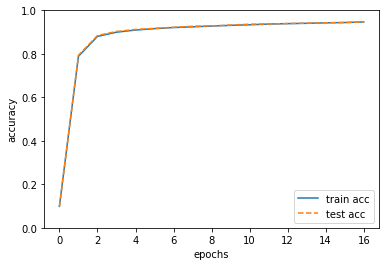

In [150]:
import train_neuralnet

### 2계층 신경망으로 MNIST 학습하기

In [151]:
train_neuralnet.network.params['W1']

array([[ 0.00942708,  0.01046141, -0.01547461, ..., -0.01264176,
         0.00498976, -0.00760555],
       [-0.00919521,  0.00509837, -0.00088337, ...,  0.00369978,
        -0.00335115,  0.00122208],
       [-0.00610906, -0.00792702, -0.02363805, ...,  0.00119795,
        -0.01323538,  0.00372097],
       ..., 
       [ 0.00324254, -0.00804558,  0.00813993, ..., -0.0082257 ,
         0.00396457,  0.01400037],
       [ 0.00301046, -0.00529849,  0.00208741, ...,  0.00997193,
        -0.01644316, -0.00299144],
       [-0.00926377,  0.00276709, -0.00059377, ..., -0.01213322,
        -0.00139528, -0.00212564]])